In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Users\Shashank Ray\AppData\Local\Temp\ipykernel_13708\4141105712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

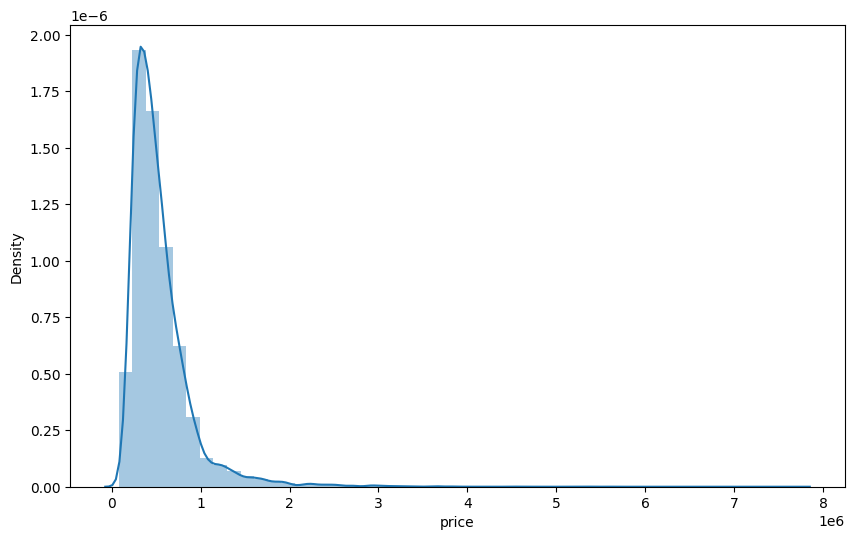

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

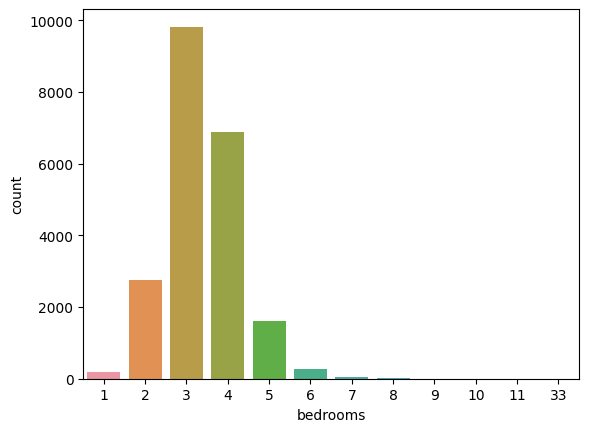

In [8]:
sns.countplot(x=df['bedrooms'])

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [15]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
date            -0.003998
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

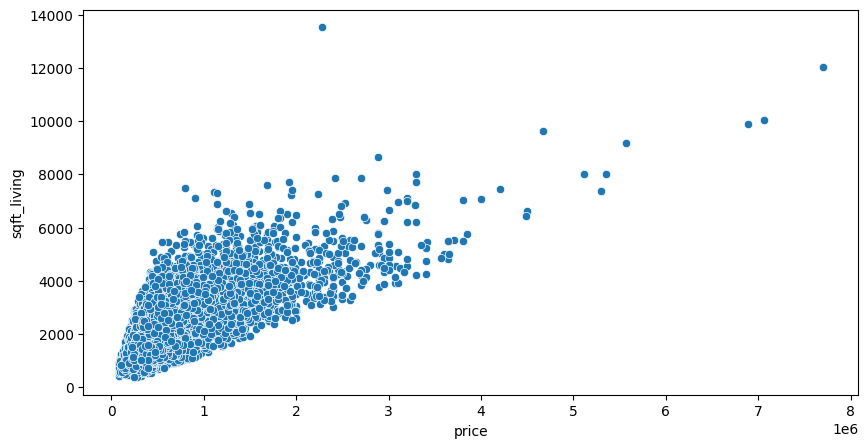

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='price', ylabel='lat'>

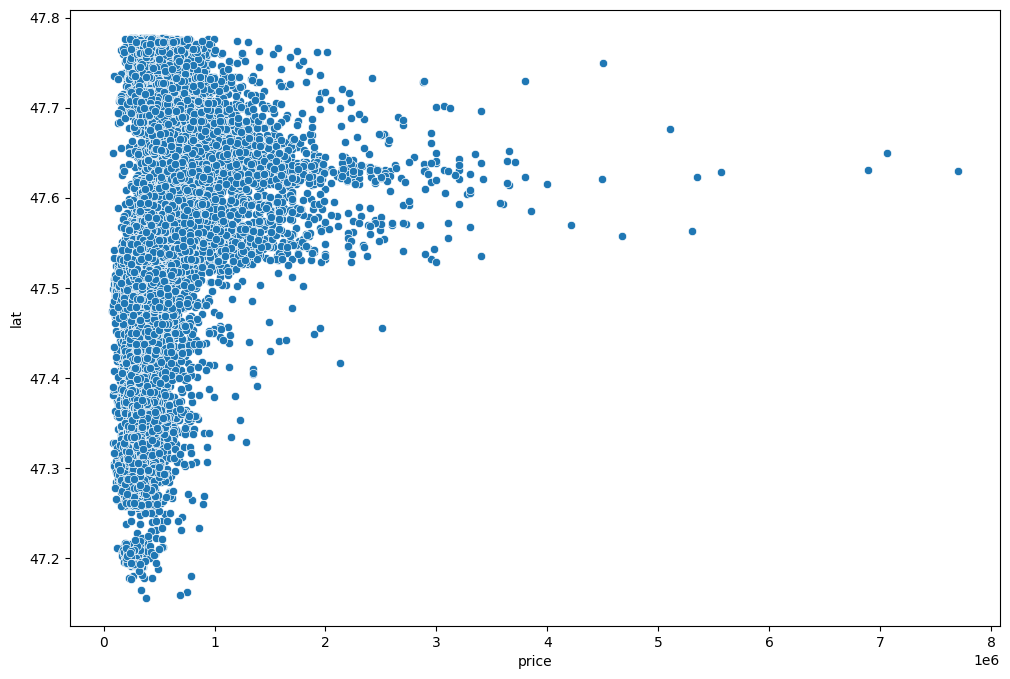

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='price', ylabel='long'>

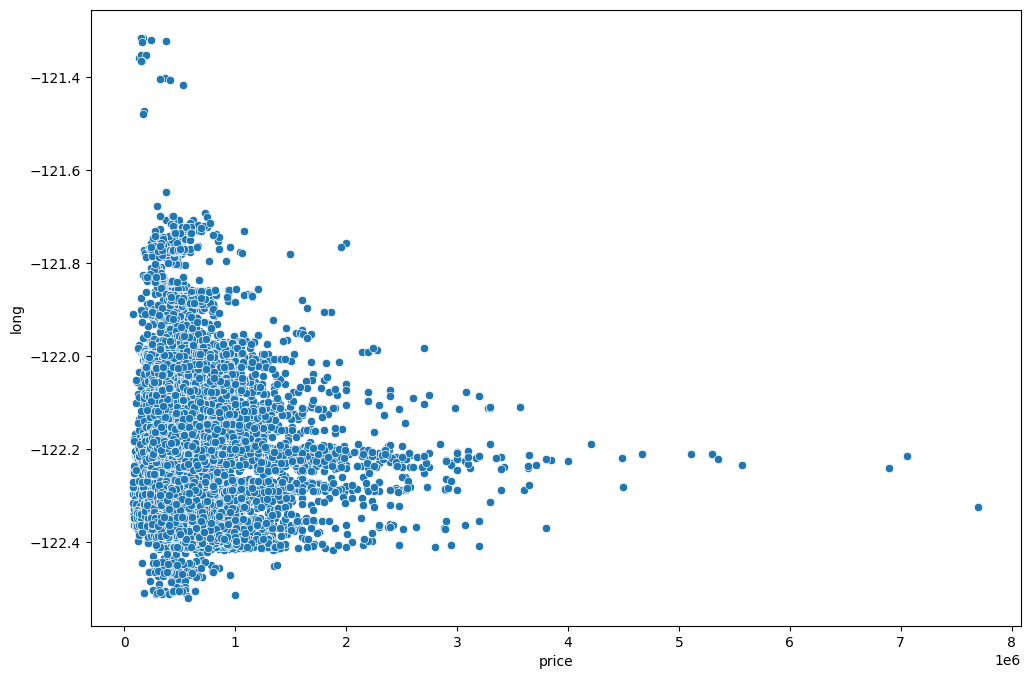

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='long', ylabel='lat'>

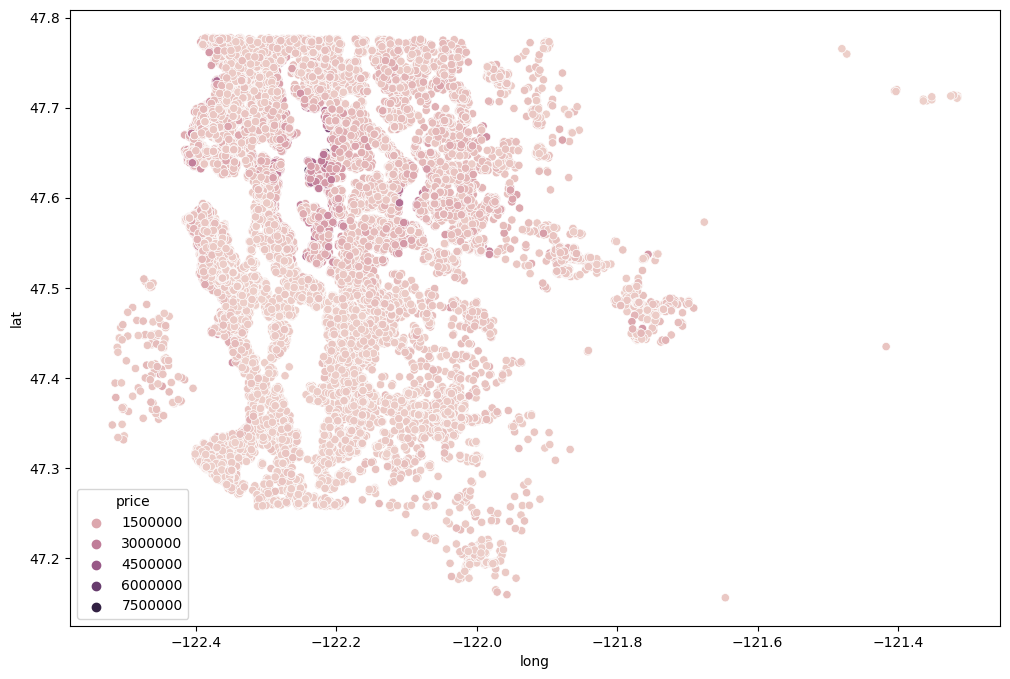

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [24]:
df = df.drop(['id'],axis=1)

In [25]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [27]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='year'>

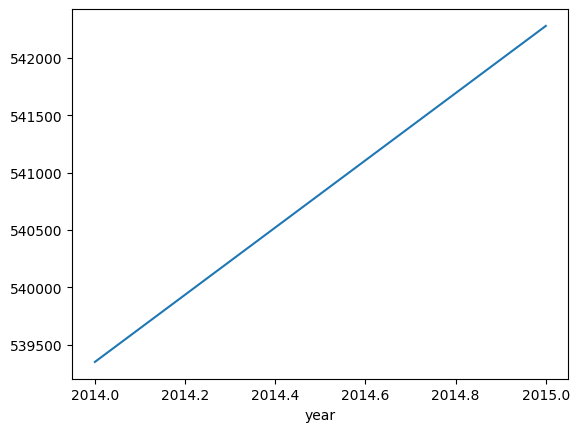

In [32]:
df.groupby('year').mean()['price'].plot()

In [36]:
df=df.drop(['date'], axis=1)

In [37]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [39]:
df=df.drop(['zipcode'],axis=1)

In [41]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [56]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 6ms/step - loss: 35215106048.0000 - val_loss: 33964845056.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 35136782336.0000 - val_loss: 33849790464.0000
Epoch 3/400
119/119 [==============================] - 1s 6ms/step - loss: 35043434496.0000 - val_loss: 33908011008.0000
Epoch 4/400
119/119 [==============================] - 1s 7ms/step - loss: 35020611584.0000 - val_loss: 33708976128.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 34897858560.0000 - val_loss: 33588355072.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 34824986624.0000 - val_loss: 33519507456.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 34752319488.0000 - val_loss: 33447772160.0000
Epoch 8/400
119/119 [==============================] - 1s 6ms/step - loss: 34697551872.0000 - val_loss: 33403944960.0000
Epoch 9/400
119/119 [===========

In [57]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.521511e+10,3.396485e+10
1,3.513678e+10,3.384979e+10
2,3.504343e+10,3.390801e+10
3,3.502061e+10,3.370898e+10
4,3.489786e+10,3.358836e+10
...,...,...
395,2.870475e+10,2.616025e+10
396,2.861945e+10,2.625078e+10
397,2.865948e+10,2.621888e+10
398,2.859560e+10,2.625404e+10


<Axes: >

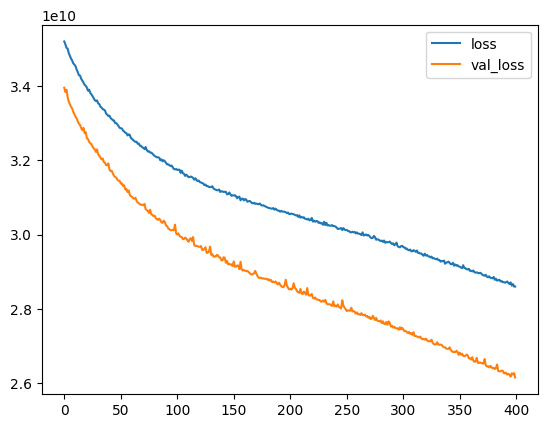

In [58]:
losses.plot()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [60]:
predictions=model.predict(X_test)

203/203 [==============================] - 1s 3ms/step


In [62]:
np.sqrt(mean_squared_error(y_test,predictions))

161670.77658490694

In [63]:
mean_absolute_error(y_test,predictions)

99568.75316116898

In [66]:
explained_variance_score(y_test,predictions)

0.8029638739823859

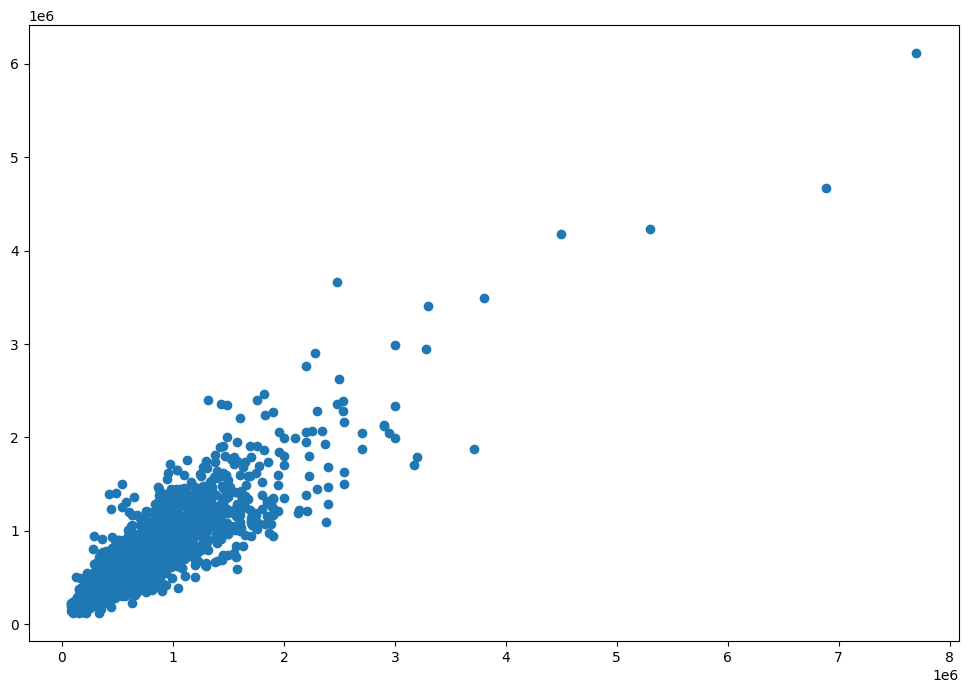

In [69]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)

In [70]:
house = df.drop('price', axis=1).iloc[0]

In [71]:
house = scaler.transform(house.values.reshape(-1,19))

In [72]:
model.predict(house)

1/1 [==============================] - 0s 45ms/step


array([[284339.97]], dtype=float32)